<a href="https://colab.research.google.com/github/rikzabk/test/blob/main/House_Prices_Prediction_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Harga Rumah menggunakan Random Forest Regressor**

Data yang digunakan adalah data House Prices yang didapatkan dari kaggle.
Data ini memiliki 79 atribut dan 2919 records.

Sumber data: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/code

## Import Library
Langkah awal yang dilakukan adalah mengimpor library-library yang dibutuhkan untuk mendukung pembuatan algoritma Random Forest Regressor dan visualisai graifk-grafiknya.

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Import Dataset
Dataset diimpor dari situs GitHub yang menyediakan data serupa dengan sumber Kaggle. Hal ini dilakukan karena pemodelan algoritma dilakukan pada CASE Tools online sehingga pengambilan data lebih mudah dilakukan melalui situs online daripada mengunggah data lokal.
Data train dan data test di impor dan ditampilkan shape serta 10 instances awalnya.

In [ ]:
#membaca data train dan data test
train = pd.read_csv('https://raw.githubusercontent.com/liyenhsu/Kaggle-House-Prices/master/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/liyenhsu/Kaggle-House-Prices/master/data/test.csv')
#print shape data
print(f'Train shape : {train.shape}')
print(f'Test shape : {test.shape}')

Train shape : (1460, 81)
Test shape : (1459, 80)


Berikut adalah 10 data awal pada dataset train.

In [ ]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

Berikut adalah 10 data awal pada dataset test.

In [ ]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

## Deskripsi dan Visualisasi Data Train 'SalePrice'
Langkah selanjutnya dilakukan pendeskripsian atribut 'SalePrice' pada data train dan memvisualisasikannya dalam bentuk histogram. 

Berikut adalah deskripsi atribut 'SalePrice'

In [ ]:
#Deskripsi 'SalePrice'
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Berikut adalah visualisasi atribut 'SalePrice' pada data train dalam bentuk histogram.

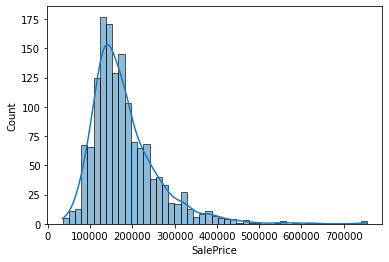

In [ ]:
#Visualisasi 'SalePrice'
sns.histplot(train['SalePrice'],kde=True)

Pada visualisasi atribut 'SalePrice' dapat diketahui bahwa data tersebut memiliki distribusi yang condong ke kanan sehingga perlu dilakukan transformasi log untuk menghilangkan skewness dari distribusi.

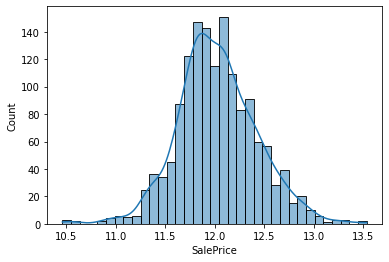

In [ ]:
#Menghilangkan skewness 'SalePrice'
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['SalePrice'],kde=True)

Setelah dilakukan penghilangan skewness, distribusi data 'SalePrice' menjadi seimbang/normal.

## Preprocessing Data
Preprocessing data dilakukan sebelum pemodelan algoritma. Hal ini bertujuan untuk memastikan data yang akan digunakan sudah bersih dari outlier maupun nilai yang hilang sehingga data siap untuk diolah menjadi model algoritma.
Preprocessing awal yang dilakukan adalah menggabungkan dataset yang terpisah menjadi train dan test pada impor data.

Berikut adalah proses penggabungan data train dan data test yang sebelumnya terpisah pada proses impor data. Pada proses ini juga dilakukan penampilan 10 data awal dari hadil penggabungan kedua data tersebut.

In [ ]:
#menggabungkan data yang terpisah menjadi train dan test pada proses impor dataset
data = pd.concat([train,test], axis=0)
y_train = train['SalePrice']
print(data.head(10))

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition  SalePrice
0   1          60       RL  ...        WD         Normal  12.247699
1   2          20       RL  ...        WD         Normal  12.109016
2   3          60       RL  ...        WD         Normal  12.317171
3   4          70       RL  ...        WD        Abnorml  11.849405
4   5          60       RL  ...        WD         Normal  12.429220
5   6          50       RL  ...        WD         Normal  11.870607
6   7          20       RL  ...        WD         Normal  12.634606
7   8          60       RL  ...        WD         Normal  12.206078
8   9          50       RM  ...        WD        Abnorml  11.774528
9  10         190       RL  ...        WD         Normal  11.678448

[10 rows x 81 columns]


Berikut adalah visualisasi distributsi tipe data pada data yang sudah digabung.

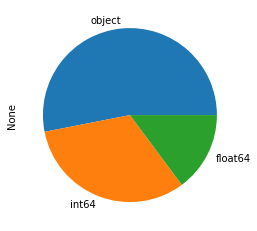

In [ ]:
#visualisasi distribusi tipe data
data.dtypes.value_counts().plot.pie()

Penyampaian informasi mengenai data yang sudah digabung juga ditambahkan mengenai deskripsi data tergabung dengan tipe data atribut numerik.

In [ ]:
#deskripsi data tergabung pada data bertipe numerik
data[data.select_dtypes(exclude='object').columns].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,12.024057
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,0.399449
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,11.775105
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,13.534474


Langkah preprocessing selanjutnya adalah identifikasi nilai yang hilang. Identifikasi nilai yang hilang dapat dilakukan dengan memvisualisasikannya data-data yang hilang pada heatmap. Data yang hilang akan menunjukkan warna dengan nilai 1.0.

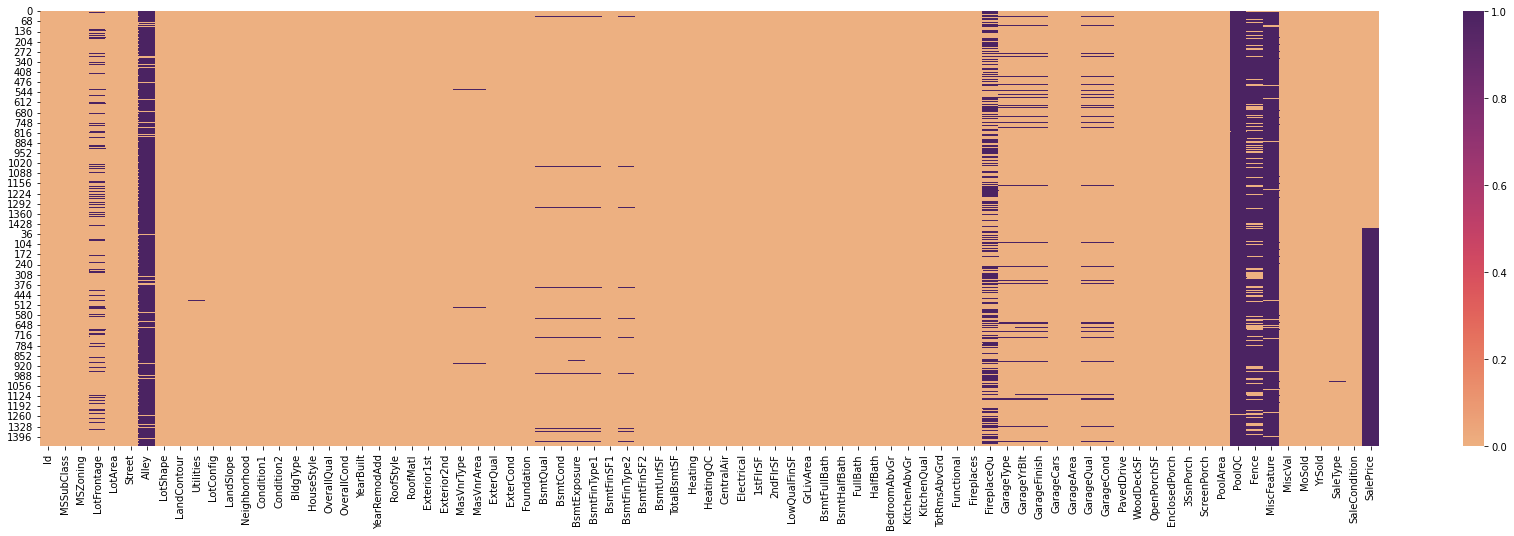

In [ ]:
#Visualisasi nilai null dalam kolom
plt.figure(figsize=(30,8));
sns.heatmap(data.isnull(), cmap='flare');

Dari hasil visualisasi nilai yang hilang tersebut dapat diketahui bahwa dataset ini masih memiliki data yang hilang. Namun, heatmap tidak dapat menunjukkan data mana yang hilang secara detail karena jumlah atribut dan instance yang terlalu besar. Oleh karena itu, pencarian data yang hilang lebih mudah dengan dilakukan penjumlahan data hilang pada masing-masing atributnya. Berikut adalah penampilan 10 data teratas pada atribut yang memiliki data yang hilang terbanyak.

In [ ]:
#kolom dengan nilai null terbanyak
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
Sp = data['SalePrice']
print(missing_data.head(10))

              Total    Percent
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
SalePrice      1459  49.982871
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageQual      159   5.447071
GarageYrBlt     159   5.447071
GarageFinish    159   5.447071


Untuk mengatasi data yang hilang tersebut, dilakukan penghapusan kolom yang memiliki banyak nilai yang hilang. Penghapusan kolom dilakukan pada kolom yang memiliki nilai yang hilang lebih dari 5 instance dengan tujuan untuk mengurangi jumlah data yang hilang dengan mudah. 

In [ ]:
#penghapusan kolom dengan nilai null lebih dari 5
data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
data['SalePrice'] = Sp
Sp_Mean = data['SalePrice'].mean()
data.dropna(inplace=True)

Setelah kolom-kolom yang memiliki data yang hilang lebih dari lima dihapus, pengolahan data terhadap nilai yang hilang yang tersisa dilakukan pengisian data yang hilang dengan nilai '0' pada data numerik dan nilai terdekat pada data kategorik.

In [ ]:
#mengisi data numerik
numeric_missed = ['BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'BsmtFullBath',
'BsmtHalfBath',
'GarageArea',
'GarageCars']
for feature in numeric_missed:
    data[feature] = data[feature].fillna(0)
#mengisi data kategorik
categorical_missed = ['Exterior1st',
'Exterior2nd',
'SaleType',
'MSZoning',
'Electrical',
'KitchenQual',
'Functional']
for feature in categorical_missed:
    data[feature] = data[feature].fillna(data[feature].mode()[0])
#menghapus kolom utilities
data.drop(['Utilities'], axis=1, inplace=True)

Pengecekan jumlah nilai yang hilang dilakukan untuk memastikan bahwa dataset sudah bersih dari nilai yang hilang.

In [ ]:
#pengecekan jumlah nilai null
data.isnull().sum().max()

0

Setelah itu, pengecekan nilai kemiringan pada masing-masing atribut dilakukan kembali untuk memastikan data sudah terdistribusi secara normal.

In [ ]:
#kolom dengan nilai kemiringan tertinggi
numeric_features = data.dtypes[data.dtypes != 'object'].index
skewed_features = data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
print(high_skew)

MiscVal          24.443278
PoolArea         14.807992
LotArea          12.190881
3SsnPorch        10.290132
LowQualFinSF      8.998885
KitchenAbvGr      4.482026
BsmtFinSF2        4.249219
ScreenPorch       4.116334
BsmtHalfBath      4.097541
EnclosedPorch     3.085342
OpenPorchSF       2.361099
BsmtFinSF1        1.683465
WoodDeckSF        1.539362
TotalBsmtSF       1.525190
MSSubClass        1.407171
1stFlrSF          1.375089
GrLivArea         1.364297
BsmtUnfSF         0.918367
2ndFlrSF          0.813466
OverallCond       0.691340
HalfBath          0.677275
TotRmsAbvGrd      0.676068
Fireplaces        0.647913
BsmtFullBath      0.594354
YearRemodAdd     -0.502108
YearBuilt        -0.612133
dtype: float64


Dari pengecakan nilai kemiringan pada masing-masing atribut dapat diketahui bahwa masih ada beberapa atribut yang memiliki nilai kemiringan yang tinggi. Untuk mengatasi hal tersebut, dilakukan tranfromasi log pada masing-masing atribut termasuk pada atribut yang memiliki nilai kemiringan tinggi.

In [ ]:
#merubah kolom dengan nilai kemiringan tertinggi
for feature in high_skew.index:
    data[feature] = np.log1p(data[feature])
data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.110874,RL,9.042040,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,7.602900,7.602900,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,6.561031,0.000000,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,2.0,548.0,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008,WD,Normal,12.247699
1,2,3.044522,RL,9.169623,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,7.589336,7.589336,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,6.886532,0.000000,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,2.0,460.0,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007,WD,Normal,12.109016
2,3,4.110874,RL,9.328212,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,7.601902,7.602401,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,6.188264,0.000000,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,2.0,608.0,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008,WD,Normal,12.317171
3,4,4.262680,RL,9.164401,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,7.557995,7.586296,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,5.379897,0.000000,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,3.0,642.0,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006,WD,Abnorml,11.849405
4,5,4.110874,RL,9.565284,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,7.601402,7.601402,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,6.486161,0.000000,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,3.0,836.0,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,RL,8.976894,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,1.791759,7.600902,7.601402,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0.000000,0.000000,6.860664,6.860664,GasA,Ex,Y,SBrkr,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,2,0.693147,3,0.693147,TA,2.079442,Typ,0.693147,2.0,460.0,Y,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,8,2007,WD,Normal,12.072547
1456,1457,3.044522,RL,9.486152,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,1.945910,7.590347,7.595387,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,6.673298,5.099866,6.380123,7.341484,GasA,TA,Y,SBrkr,7.637234,0.000000,0.0,7.637234,0.693147,0.000000,2,0.000000,3,0.693147,TA,2.079442,Min1,1.098612,2.0,500.0,Y,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,2,2010,WD,Normal,12.254868
1457,1458,4.262680,RL,9.109746,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,2.302585,7.571474,7.604396,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,5.620401,0.000000,6.777647,7.050123,GasA,Ex,Y,SBrkr,7.080868,7.050123,0.0,7.758333,0.000000,0.000000,2,0.000000,4,0.693147,Gd,2.302585,Typ,1.098612,1.0,252.0,Y,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,5,2010,WD,Normal,12.493

## Pemodelan Algoritma
Setelah memastikan data yang digunakan sudah bersih dan siap digunakan, langkah selanjutnya adalah pemodelan algoritma.

Langkah awal pemodelan algoritma yaitu memilih atribut yang digunakan. Pada percobaan ini, pemodelan algoritma yang akan dibuat menggunakan semua atribut bertipe numerik. Setelah itu, pemisahan data menjadi x train, y train, x test, dan y test dilakukan dengan memberikan proporsi pada data train dan test masing-masing sebesar 80% dan 20%. Pada pemisahan data ini diberi random state dengan nilai 123 yang bertujuan agar pemisahan data tidak berubah-ubah ketika dilakukan running program. 

In [ ]:
#pemisahan data menjadi x train, y train, x test, y test
X = data.select_dtypes(exclude=['object'])
X = X.drop(['SalePrice'], axis = 1)
Y = data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
X

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,4.110874,9.042040,7,1.791759,7.602900,7.602900,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,2.197225,0.000000,2.0,548.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,2,2008
1,2,3.044522,9.169623,6,2.197225,7.589336,7.589336,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,1.945910,0.693147,2.0,460.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,5,2007
2,3,4.110874,9.328212,7,1.791759,7.601902,7.602401,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,1.945910,0.693147,2.0,608.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,9,2008
3,4,4.262680,9.164401,7,1.791759,7.557995,7.586296,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,2.079442,0.693147,3.0,642.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,2,2006
4,5,4.110874,9.565284,8,1.791759,7.601402,7.601402,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,2.302585,0.693147,3.0,836.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,8.976894,6,1.791759,7.600902,7.601402,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,0.0,7.407318,0.000000,0.000000,2,0.693147,3,0.693147,2.079442,0.693147,2.0,460.0,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,8,2007
1456,1457,3.044522,9.486152,6,1.945910,7.590347,7.595387,6.673298,5.099866,6.380123,7.341484,7.637234,0.000000,0.0,7.637234,0.693147,0.000000,2,0.000000,3,0.693147,2.079442,1.098612,2.0,500.0,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,2,2010
1457,1458,4.262680,9.109746,7,2.302585,7.571474,7.604396,5.620401,0.000000,6.777647,7.050123,7.080868,7.050123,0.0,7.758333,0.000000,0.000000,2,0.000000,4,0.693147,2.302585,1.098612,1.0,252.0,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,5,2010
1458,1459,3.044522,9.181735,5,1.945910,7.576097,7.599401,3.912023,6.937314,0.000000,6.983790,6.983790,0.000000,0.0,6.983790,0.693147,0.000000,1,0.000000,2,0.693147,1.791759,0.000000,1.0,240.0,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,4,2010


Setelah data dipisah menjadi train dan test, langkah selanjutnya adalah pembuatan model Random Forest. Pembuatan model ini menggunakan fungsi RandomForestRegressor dengan pemberian nilai estimator sebesar 100 dan maksimal kedalaman sebesar 20. Pada pembuatan model ini juga diberi random state dengan nilai 123 dengan tujuan agar model algoritma yang dibuat tidak berubah-ubah ketiak dilakukan running program.

In [ ]:
#pembuatan model
clf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=123)

In [ ]:
clf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, random_state=123)

Untuk mengetahui pemodelan algoritma yang dibuat sudah baik/benar atau belum, maka dilakukan penghitungan skor data x_test dan y_test.

In [ ]:
clf.score(x_test,y_test)

0.8820989231327726

Dari perhitungan nilai evaluasi model dapat diketahui bahwa model algoritma yang dibuat memiliki nilai evaluasi sebesar ~0,8821 atau 88,21%. Nilai ini sudah cukup bagus bagi sebuah model algoritma untuk digunakan dalam pengambilan keputusan. Karena sudah diketahui bahwa nilai model sudah cukup baik, maka dilakukan prediksi harga pada data test.

In [ ]:
#melakukan prediksi
prediction = clf.predict(x_test)
print(prediction)

[12.34416015 11.69259606 11.92768668 12.48132922 11.88654378 12.42151659
 12.6168181  11.72535898 11.82472935 11.65976947 11.93722721 12.33569715
 11.77338215 11.66621032 12.38624654 12.06169985 11.9371879  12.73645317
 12.32332308 12.045295   11.91843249 12.06836138 11.51817404 12.02267764
 12.3000885  11.89921788 12.15735994 12.12319581 11.74464542 11.89375075
 11.78939095 12.34168128 11.82214738 12.26841067 12.73491    12.25902583
 11.99066759 12.82630655 12.00592126 11.46656527 11.81816767 12.26990764
 12.08357723 12.0038458  12.19992826 11.62665402 12.43302331 12.30413173
 12.42993675 11.69158242 12.15724736 12.06670955 11.89843627 11.98973275
 11.67234726 11.92003895 11.78283465 12.07218323 12.45322045 12.81950158
 11.48149123 12.7468121  12.05489202 11.9826929  12.24860911 11.82758094
 11.63767317 12.30873988 12.3742799  11.86684013 11.91268171 12.22489376
 11.98383877 12.48064896 12.1007745  11.6032756  12.08864496 11.84327075
 12.27299306 12.0293069  12.67251124 12.56975704 11

Karena array nilai prediksi harga rumah yang dihasilkan masih belum dalam bentuk satuan dolar Amerika (USD$), maka dilakukan invers nilai.

In [ ]:
#menerapkan invers
y_pred=np.expm1(prediction)
print(y_pred)

[229614.20240789 119681.30579923 151399.9181084  263372.7002925
 145297.2458563  248081.48863031 301587.29504799 123667.3891464
 136587.67933742 115816.32787029 152851.2743985  227679.16760999
 129751.25105021 116564.69800834 239484.11442587 173112.00265755
 152845.26702712 339914.78255254 224879.19628596 170295.27600279
 150005.28795408 174269.04970362 100525.23736966 166486.85507366
 219714.43282388 147150.48976195 190489.94548099 184091.9013623
 126075.66115258 146348.18824167 131845.14493036 229045.71945379
 136235.46628592 212863.40980929 339390.63863477 210875.0561717
 161241.96184352 371871.58226762 163720.36330236  95468.80185584
 135694.36174321 213182.300496   176940.99273155 163380.91815722
 198773.89008781 112043.79440991 250952.59338013 220604.59036998
 250179.20360762 119560.05213746 190468.49990796 173981.42257427
 147035.52059408 161091.29596017 117282.25366777 150246.46029945
 130983.54971554 174936.35795307 256072.66927882 369349.58826136
  96904.46797255 343454.24641

In [ ]:
#merubah y_test menjadi bernilai mata uang
y_test2 = np.expm1(y_test)
print(y_test2)

147     222500.0
676      87000.0
1304    130000.0
1372    274300.0
1427    140000.0
          ...   
1012    165000.0
1059    220000.0
890     122900.0
628     135000.0
352      95000.0
Name: SalePrice, Length: 292, dtype: float64


Setelah dilakukan pengubahan nilai array menjadi bernilai mata uang dengan satuan dolar Amerika (USD$), informasi prediksi harga rumah sudah dapat dimanfaatkan sesuai kebutuhan. Model algoritma yang sudah dibuat juga dapat digunakan untuk memprediksi harga rumah pada data set sejenis ke depannya. Untuk melengkapi informasi hasil prediksi harga rumah, dilakukan perbandingan data hasil prediksi dengan data test. Penyajian perbandingan data ini disajikan dalam bentuk scatter plot dan line chart.

Berikut adalah perbandingan harga rumah hasil prediksi dan data test berupa scatter plot. Sumbu-x pada gambar ini menunjukkan nilai prices pada data test, sedangkan sumbu-y menunjukkan harga rumah hasil prediksi pemodelan algoritma. 

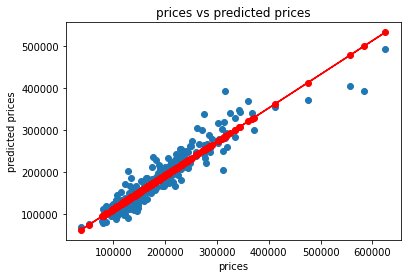

In [ ]:
plt.scatter(y_test2, y_pred)
plt.xlabel("prices")
plt.ylabel("predicted prices")
plt.title("prices vs predicted prices")
z = np.polyfit(y_test2, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test2, p(y_test2), "r-o")
plt.show()

In [ ]:
#merubah prediksi dan harga asli menjadi dataframe
actual = y_test2.to_frame()
actual.reset_index()
print(actual)
print(type(actual))
pred = pd.DataFrame(y_pred, columns = ['PredictedPrice'], index=actual.index)
print(pred)
print(type(pred))

      SalePrice
147    222500.0
676     87000.0
1304   130000.0
1372   274300.0
1427   140000.0
...         ...
1012   165000.0
1059   220000.0
890    122900.0
628    135000.0
352     95000.0

[292 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
      PredictedPrice
147    229614.202408
676    119681.305799
1304   151399.918108
1372   263372.700292
1427   145297.245856
...              ...
1012   135666.732819
1059   167149.578003
890    101054.073379
628    187092.722136
352     96098.606683

[292 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


Berikut adalah perbandingan harga rumah hasil prediksi dan data test berupa scatter plot. Sumbu-x pada gambar ini menunjukkan index dari kedua data, sedangkan sumbu-y menunjukkan harga rumah hasil prediksi pemodelan algoritma. 

In [ ]:
#pengolahan index untuk pembuatan diagram
idx = np.sort(actual.index)
len(idx)

292

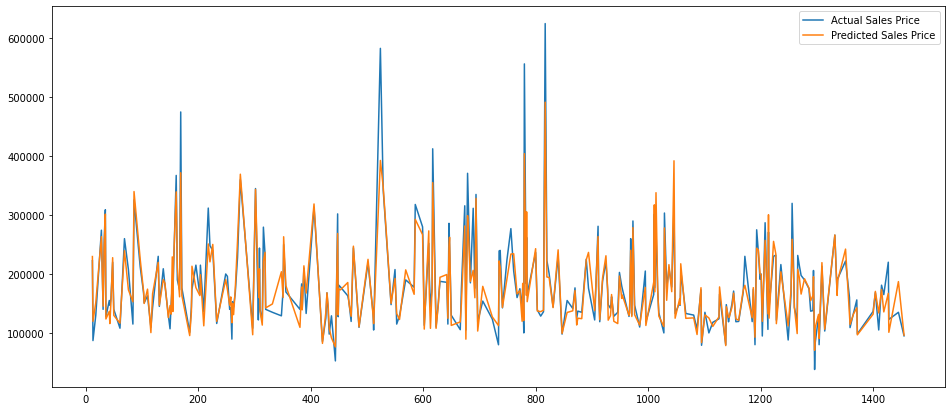

In [ ]:
#diagram garis perbandingan predicted price dengan actual price
plt.figure(figsize = (16, 7))
plt.plot(idx, actual, label = "Actual Sales Price")
plt.plot(idx, pred, label = "Predicted Sales Price")
plt.legend()
plt.show()